In [1]:
# import modules and data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_telco = pd.read_csv('churn_data.csv')
df_telco

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,...,has_churned,has_phone,has_internet,has_phone_and_internet,partner_dependents,avg_monthly_charges,avg_bool_check,contract_type.1,phone_type,internet_type
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.60,...,False,True,True,True,3,65.6,TRUE,1 Year,One Line,DSL
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.90,...,False,True,True,True,0,59.9,TRUE,Month-to-Month,Two or More Lines,Fiber Optic
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.90,...,True,True,True,True,0,73.9,TRUE,Month-to-Month,One Line,DSL
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.00,...,True,True,True,True,1,98,TRUE,Month-to-Month,One Line,DSL
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.90,...,True,True,True,True,1,83.9,TRUE,Month-to-Month,One Line,DSL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7044,9987-LUTYD,Female,0,No,No,1,1,1,Mailed check,55.15,...,False,True,True,True,0,55.15,TRUE,1 Year,One Line,DSL
7045,9992-RRAMN,Male,0,Yes,No,2,2,0,Electronic check,85.10,...,True,True,True,True,1,85.1,TRUE,Month-to-Month,Two or More Lines,Fiber Optic
7046,9992-UJOEL,Male,0,No,No,1,1,0,Mailed check,50.30,...,False,True,True,True,0,50.3,TRUE,Month-to-Month,One Line,DSL
7047,9993-LHIEB,Male,0,Yes,Yes,1,1,2,Mailed check,67.85,...,False,True,True,True,3,67.85,TRUE,2 Year,One Line,DSL


Data looks pretty clean.  No rows have null data. But can drop some of the columns to clean the data a little.
Justification for column drops:
- is_female : just use gender
- avg_monthly_charges : can be calculated easily
- avg_bool_check : only a check on the calculation
- contract_type, phone_service, internet_service : covered by contract_type1 (rename this as contract_type), phone_type, internet_type
- rounded_tenure : was only used in the spreadsheets exercise
- partner_dependents : covered by partner and dependents

In [3]:
df_telco.drop(columns = [
    'is_female', 
    'avg_monthly_charges', 
    'avg_bool_check', 
    'contract_type', 
    'phone_service', 
    'internet_service',
    'rounded_tenure',
    'partner_dependents'
], inplace = True)
df_telco.rename(columns={'contract_type.1': 'contract_type'}, inplace=True)

In [4]:
# add a boolean column for senior citizen
df_telco['is_senior_bool'] = df_telco['is_senior_citizen']==1
df_telco
#make a column with automatic payment
df_telco['automatic_payment'] = df_telco.payment_type.str.contains('automatic')
df_telco
df_telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             7049 non-null   object 
 1   gender                  7049 non-null   object 
 2   is_senior_citizen       7049 non-null   int64  
 3   partner                 7049 non-null   object 
 4   dependents              7049 non-null   object 
 5   payment_type            7049 non-null   object 
 6   monthly_charges         7049 non-null   float64
 7   total_charges           7038 non-null   float64
 8   churn                   7049 non-null   object 
 9   tenure                  7049 non-null   float64
 10  service_type            7049 non-null   object 
 11  has_churned             7049 non-null   bool   
 12  has_phone               7049 non-null   bool   
 13  has_internet            7049 non-null   bool   
 14  has_phone_and_internet  7049 non-null   

Look at some basic statistics between churned and not-churned

In [5]:
df_churned = df_telco[df_telco.churn == 'Yes']
df_churned.describe()

,is_senior_citizen,monthly_charges,total_charges,tenure
count,1870.000000,1870.000000,1870.000000,1870.000000
mean,0.254545,74.417834,1530.993262,17.960909
std,0.435722,24.680381,1890.635868,19.555915
min,0.000000,18.850000,18.850000,1.000000
25%,0.000000,56.150000,134.387500,2.100000
50%,0.000000,79.625000,702.200000,9.700000
75%,1.000000,94.200000,2328.425000,29.100000
max,1.000000,118.350000,8684.800000,74.200000


In [6]:
df_unchurned = df_telco[df_telco.churn == 'No']
df_unchurned.describe()

,is_senior_citizen,monthly_charges,total_charges,tenure
count,5179.000000,5179.000000,5168.000000,5179.000000
mean,0.128596,61.255136,2555.167463,37.586445
std,0.334785,31.101952,2329.074537,24.148137
min,0.000000,18.250000,18.800000,0.000000
25%,0.000000,25.100000,578.162500,14.850000
50%,0.000000,64.400000,1683.000000,37.600000
75%,0.000000,88.400000,4264.062500,60.700000
max,1.000000,118.750000,8672.450000,79.300000


## How big is the churn problem?

- What proportion of customers have churned?
- what is the loss of profit per month do churned customers represent?

In [7]:
# ~26% of customers have churned
df_telco.has_churned.mean()

0.2652858561498085

In [8]:
# Churned customers represent $139,161.36 lost per month
df_telco[df_telco.has_churned].monthly_charges.sum()

139161.35

In [9]:
df_telco[df_telco.has_churned].monthly_charges.sum()/df_telco.monthly_charges.sum()

0.30490979766289217

#### Take aways
The 26% of churned customers represent a loss of $139,161.36 per month

## What are the characteristics of a churned customers?

Text(0.5, 0, 'Churn')

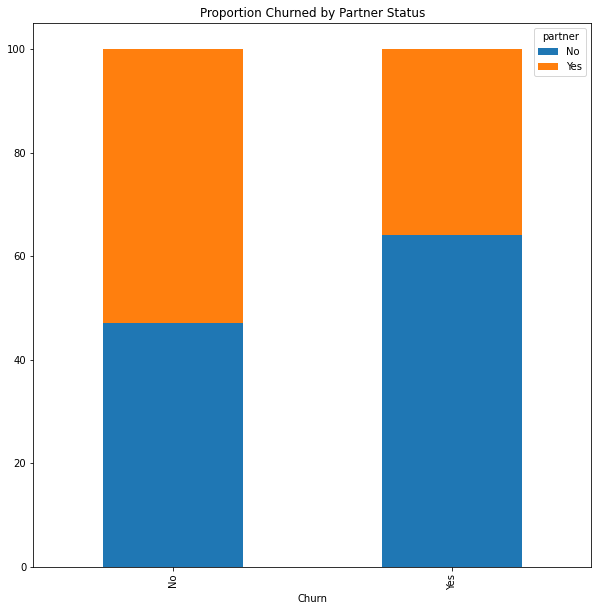

In [11]:
# partnered
df_churned.partner.value_counts()
pd.crosstab(df_telco.churn, df_telco.partner).apply(lambda x: x*100/sum(x), axis = 1).plot(kind='bar', stacked=True, figsize=(10,10))
plt.title('Proportion Churned by Partner Status'),
plt.xlabel('Churn')

<AxesSubplot:xlabel='churn'>

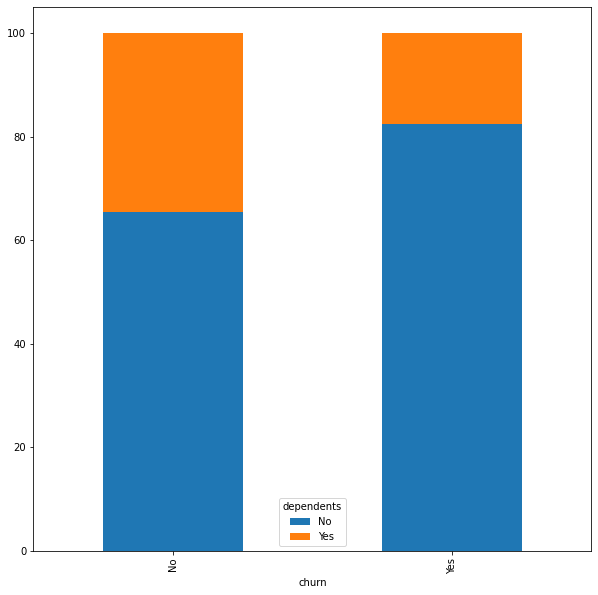

In [12]:
pd.crosstab(df_telco.churn, df_telco.dependents).apply(lambda x: x*100/sum(x), axis = 1).plot(kind='bar', stacked=True, figsize=(10,10))

<AxesSubplot:xlabel='churn'>

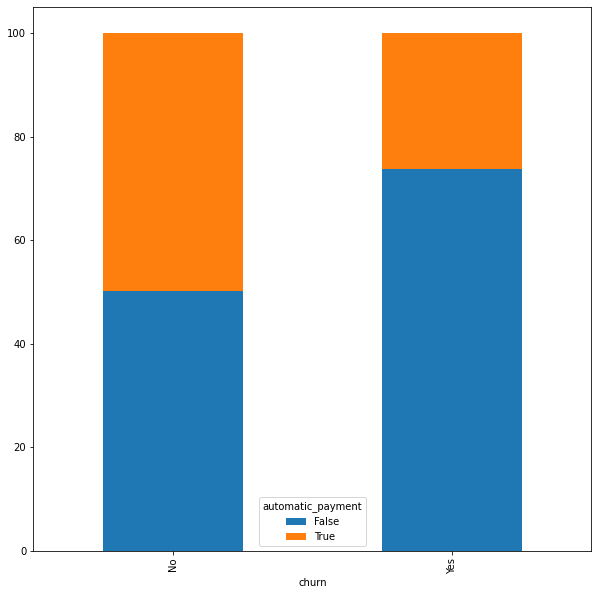

In [13]:
# payment type
pd.crosstab(df_telco.churn, df_telco.automatic_payment).apply(lambda x: x*100/sum(x), axis = 1).plot(kind='bar', stacked=True, figsize=(10,10))

<AxesSubplot:xlabel='churn'>

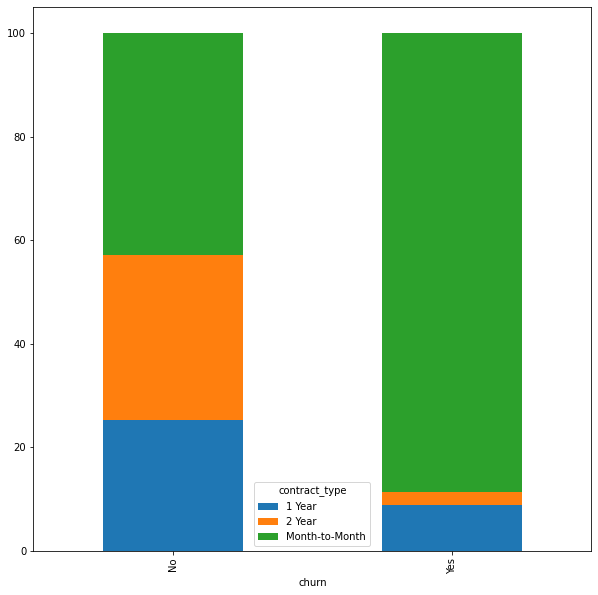

In [14]:
# contract type
pd.crosstab(df_telco.churn, df_telco.contract_type).apply(lambda x: x*100/sum(x), axis = 1).plot(kind='bar', stacked=True,figsize=(10,10))

<AxesSubplot:xlabel='churn'>

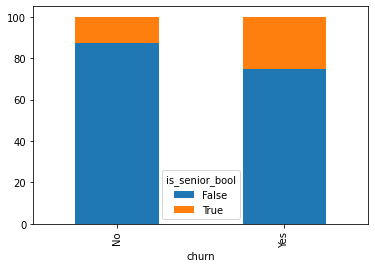

In [15]:
# senior citizen
pd.crosstab(df_telco.churn, df_telco.is_senior_bool).apply(lambda x: x*100/sum(x), axis = 1).plot(kind='bar', stacked=True)

- definitely looks like a churned customer is one paying month-to-month, without automatic payment, and with both internet and phone.
- demographic information looks like it is less prevalent of a pattern

## Are these hypotheses significant?
- compare percent churn in general population and the sub-samples

In [31]:
# automatic payments are likely among churned customers
print({df_telco[df_telco.automatic_payment].shape[0]/df_telco.shape[0]})
# automatic payments are likely among churned customers
df_telco.groupby('has_churned').automatic_payment.value_counts()

{0.43580649737551425}


has_churned  automatic_payment
False        False                2598
             True                 2581
True         False                1379
             True                  491
Name: automatic_payment, dtype: int64

In [36]:
# month-to-month customers are over represented
print(df_telco[df_telco.contract_type == 'Month-to-Month'].shape[0]/df_telco.shape[0])
print(df_telco[(df_telco.contract_type == 'Month-to-Month') & (df_telco.has_churned)].shape[0]/df_telco[df_telco.has_churned].shape[0])
# month-to-month customers are over represented
df_telco.groupby('has_churned').contract_type.value_counts()

0.5498652291105122
0.8855614973262033


has_churned  contract_type 
False        Month-to-Month    2220
             2 Year            1649
             1 Year            1310
True         Month-to-Month    1656
             1 Year             166
             2 Year              48
Name: contract_type, dtype: int64

In [37]:
df_telco.groupby('partner').has_churned.value_counts()


partner  has_churned
No       False          2442
         True           1200
Yes      False          2737
         True            670
Name: has_churned, dtype: int64

In [38]:
df_telco.groupby('dependents').has_churned.value_counts()

dependents  has_churned
No          False          3391
            True           1543
Yes         False          1788
            True            327
Name: has_churned, dtype: int64

In [39]:
df_telco.groupby('is_senior_bool').has_churned.value_counts()

is_senior_bool  has_churned
False           False          4513
                True           1394
True            False           666
                True            476
Name: has_churned, dtype: int64

In [21]:
df_telco[(df_telco.contract_type == 'Month-to-Month') & (df_telco.has_churned)].describe()

,is_senior_citizen,monthly_charges,total_charges,tenure
count,1656.000000,1656.000000,1656.000000,1656.000000
mean,0.266304,72.993720,1163.775815,14.000845
std,0.442159,24.099529,1481.461332,15.860817
min,0.000000,18.850000,18.850000,1.000000
25%,0.000000,55.187500,93.962500,1.900000
50%,0.000000,79.025000,513.225000,7.400000
75%,1.000000,90.862500,1644.475000,21.125000
max,1.000000,117.450000,7548.100000,71.800000
